# Pokemon - Exploratory Notebook

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline

Pokemon dataset contains stats of all pokemon.

Train records the outcome of fights between sets of 2 pokemon.

Test is the test set of the above fight dataset.

In [138]:
pokemon = pd.read_csv("data/pokemon.csv")
train = pd.read_csv("data/combats.csv")
test = pd.read_csv("data/tests.csv")

## Data Manipulation

See what variables we have to play with for each pokemon:

In [134]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Pair wise plot to see spread of pokemon across various characteristics:

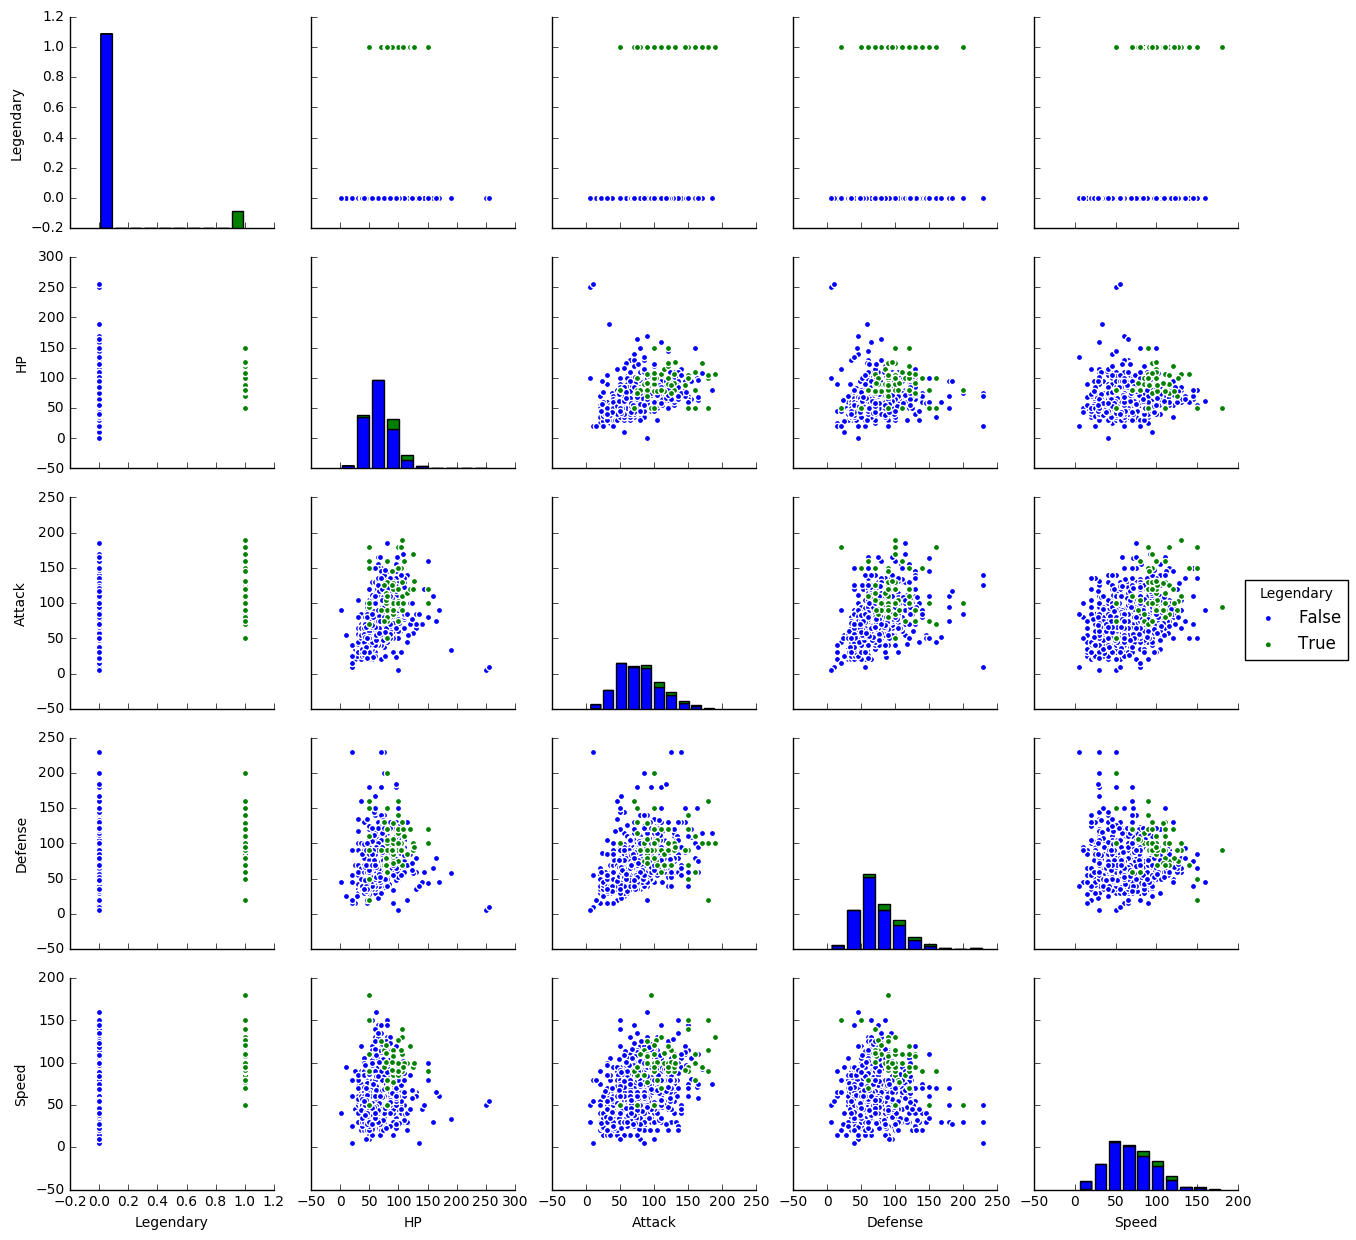

In [131]:
sns.pairplot(pokemon[['Legendary', 'HP', 'Attack', 'Defense', 'Speed']], hue = 'Legendary')

View format for training / test data:

In [135]:
train.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


Tag pokemon that lost, not just those that won. Remove origional pokemon column as not needed anymore.

In [139]:
train['Loser'] = np.where(train['First_pokemon'] == train['Winner'],
                          train['Second_pokemon'],
                          train['First_pokemon'])

train.drop(['First_pokemon', 'Second_pokemon'], axis = 1, inplace = True)

# Check output.
train.head()

,Winner,Loser
0,298,266
1,701,702
2,668,191
3,683,237
4,151,231


Now merge the pokemon stats onto the training dataset. This will leave us with 2 datasets, 1 for winners and another for the losers. This should allow us to explore the difference in stats between pokemon on each fight.

In [143]:
pokemon_winners = pd.merge(train, pokemon, how = 'left', left_on = 'Winner', right_on = '#')

pokemon_losers = pd.merge(train, pokemon, how = 'left', left_on = 'Loser', right_on = '#')

# Check output
pokemon_winners.head()

,Winner,Loser,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,298,266,298,Nuzleaf,Grass,Dark,70,70,40,60,40,60,3,False
1,701,702,701,Terrakion,Rock,Fighting,91,129,90,72,90,108,5,True
2,668,191,668,Beheeyem,Psychic,NaN,75,75,75,125,95,40,5,False
3,683,237,683,Druddigon,Dragon,NaN,77,120,90,60,90,48,5,False
4,151,231,151,Omastar,Rock,Water,70,60,125,115,70,55,1,False


Specify numeric stats cols and then find the difference in these stats between the winners and losers.

In [145]:
pokemon_stats = ['HP', 'Attack', 'Defense',
                 'Sp. Atk', 'Sp. Def', 'Speed']

stats_differences = pokemon_winners[pokemon_stats] - pokemon_losers[pokemon_stats]

# Spotted a bunch of NAs at end of dataset, remove them.
stats_differences.dropna(inplace = True)

stats_differences.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,20,6,-10,15,-10,19
1,0,39,18,-18,-39,0
2,20,35,-10,45,-10,0
3,37,80,50,-10,50,28
4,50,50,-105,105,-160,50


Another pairplot of the stats differences between those that won and lost. Not much to see here!

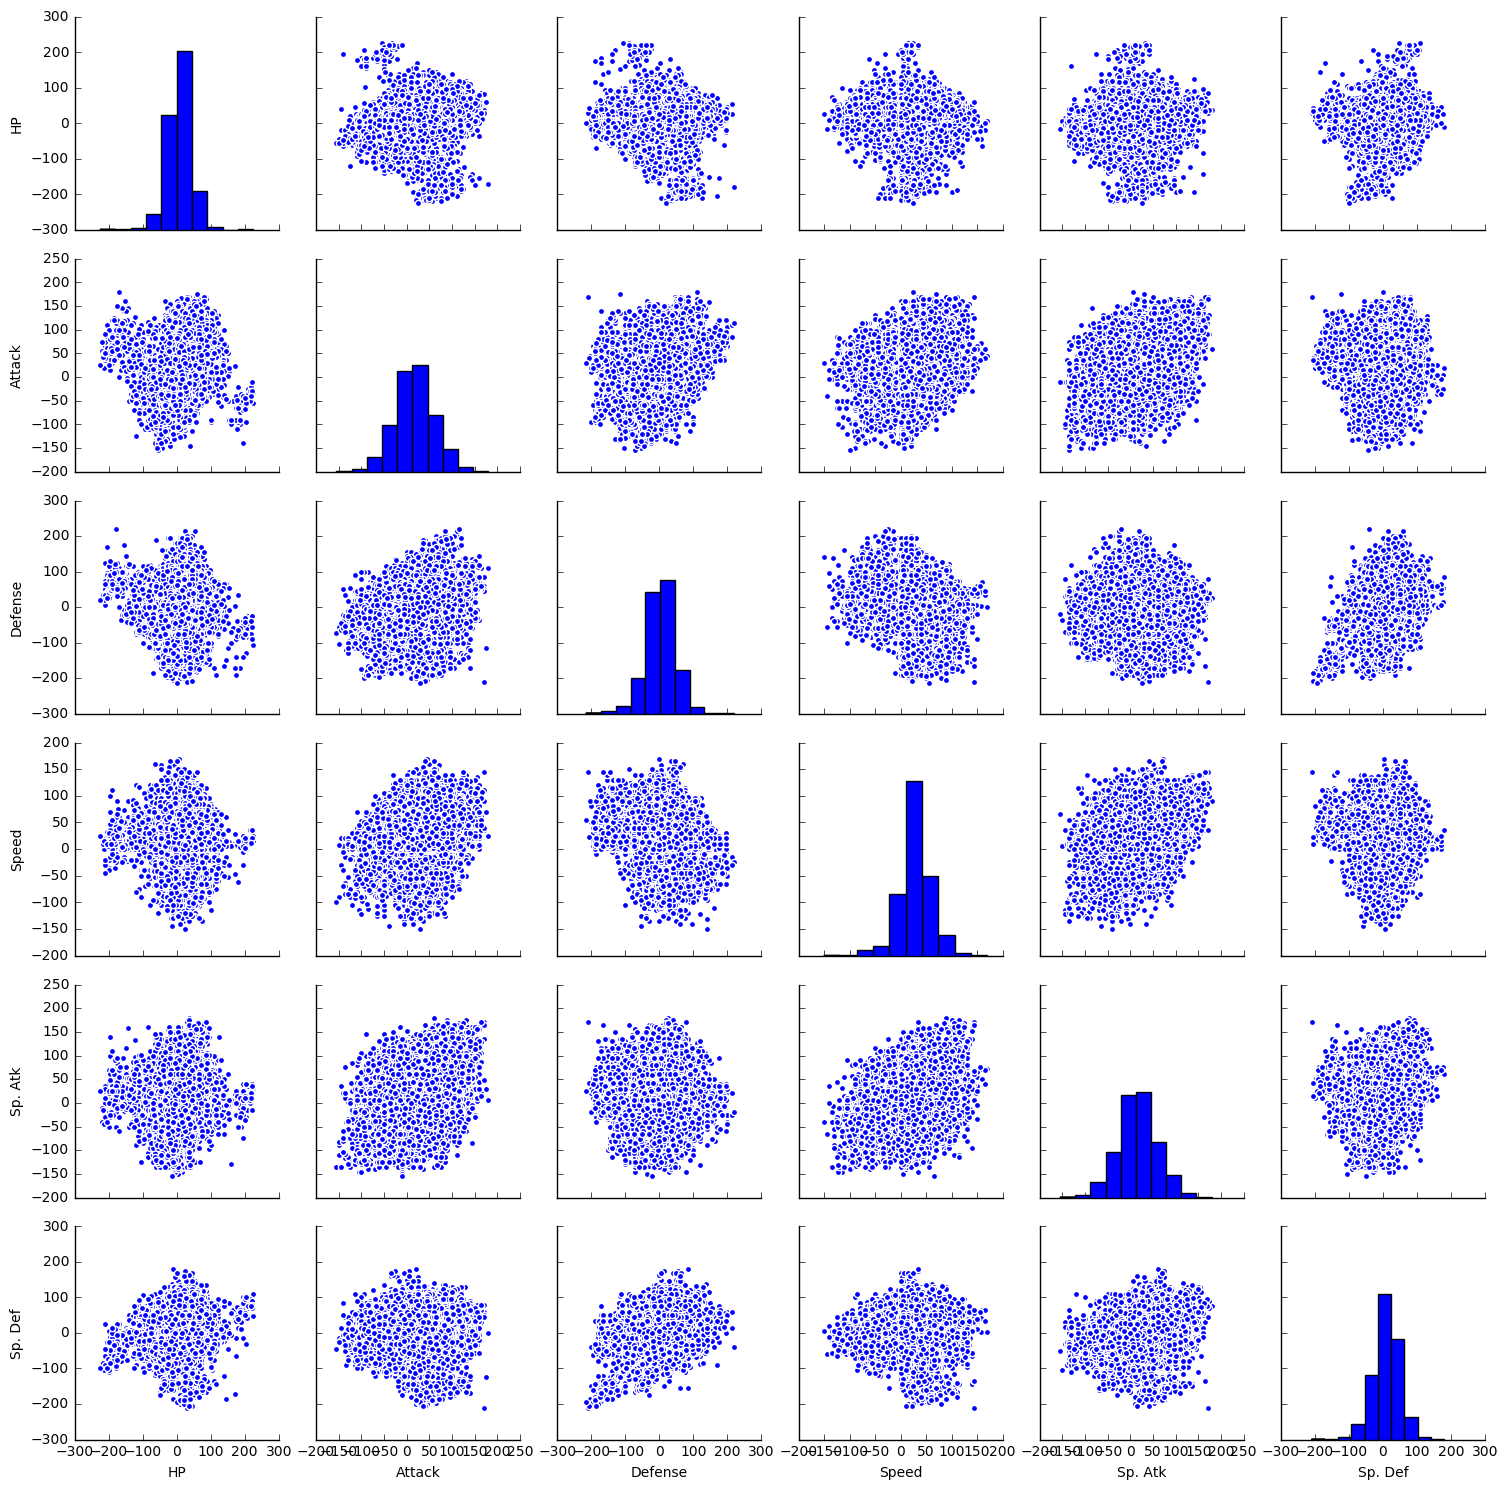

In [170]:
sns.pairplot(stats_differences[['HP', 'Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def']])

Tag the data depending on whether the pokemon won or lost. Then concatenate the dataframes into one:

In [124]:
pokemon_winners['Result'] = 'Winner'
pokemon_losers['Result'] = 'Loser'

winners_and_losers = pd.concat([pokemon_winners, pokemon_losers])

winners_and_losers.dropna(inplace = True)

Let's see if we can see any large differences between the winners and losers.

The issue with the below plot is partly that I can't seem to get the alpha of the scatter points to change but also there are lots of repeated pokemon so I don't think this is a great way of viewing the data. For example you could have the same pokemon 5 times, with 3 wins or 2 loses, but this information is hidden in the plot below.

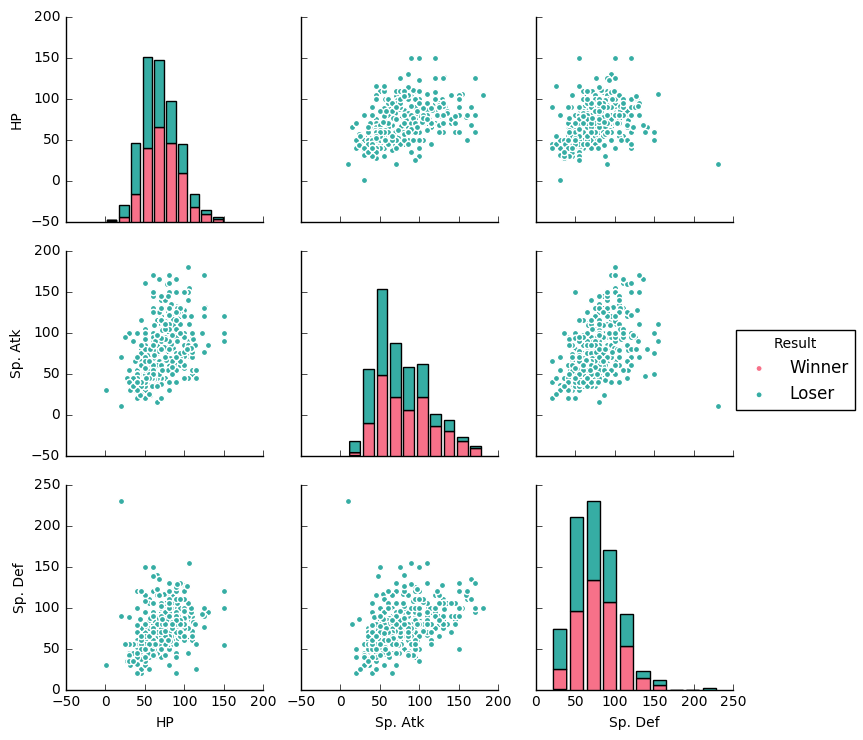

In [168]:
plot = sns.pairplot(winners_and_losers[['HP', 'Sp. Atk', 'Sp. Def', 'Result']],
                    hue = 'Result',
                    palette = "husl")

plot.set(alpha = .1)

## Analysis

After a quick look at the data let's start running some models.